# Snowflake for DataMesh

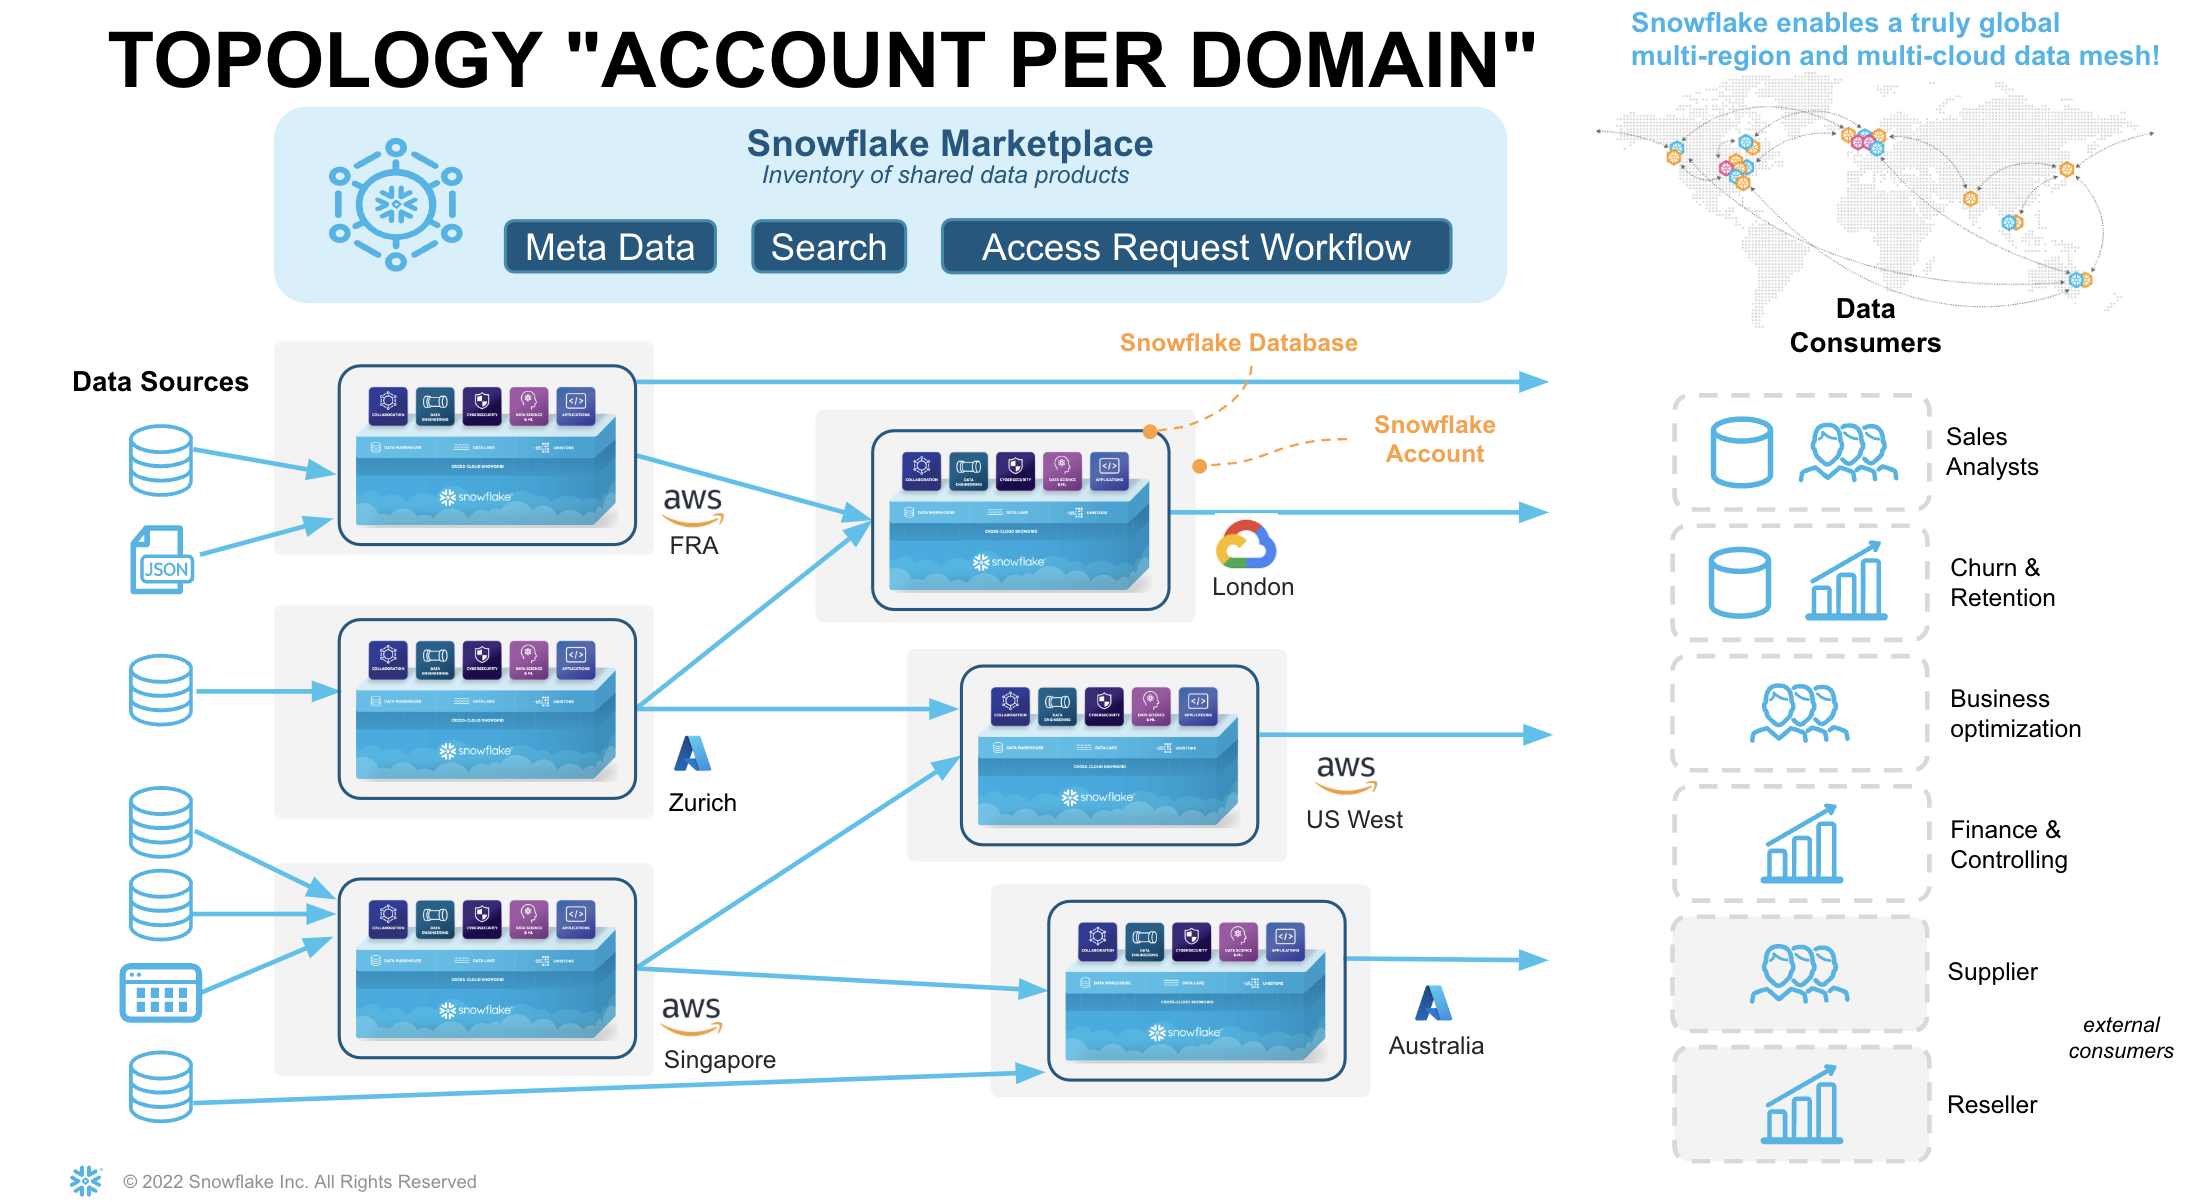

# SCENARIO WE ARE GOING TO COVER
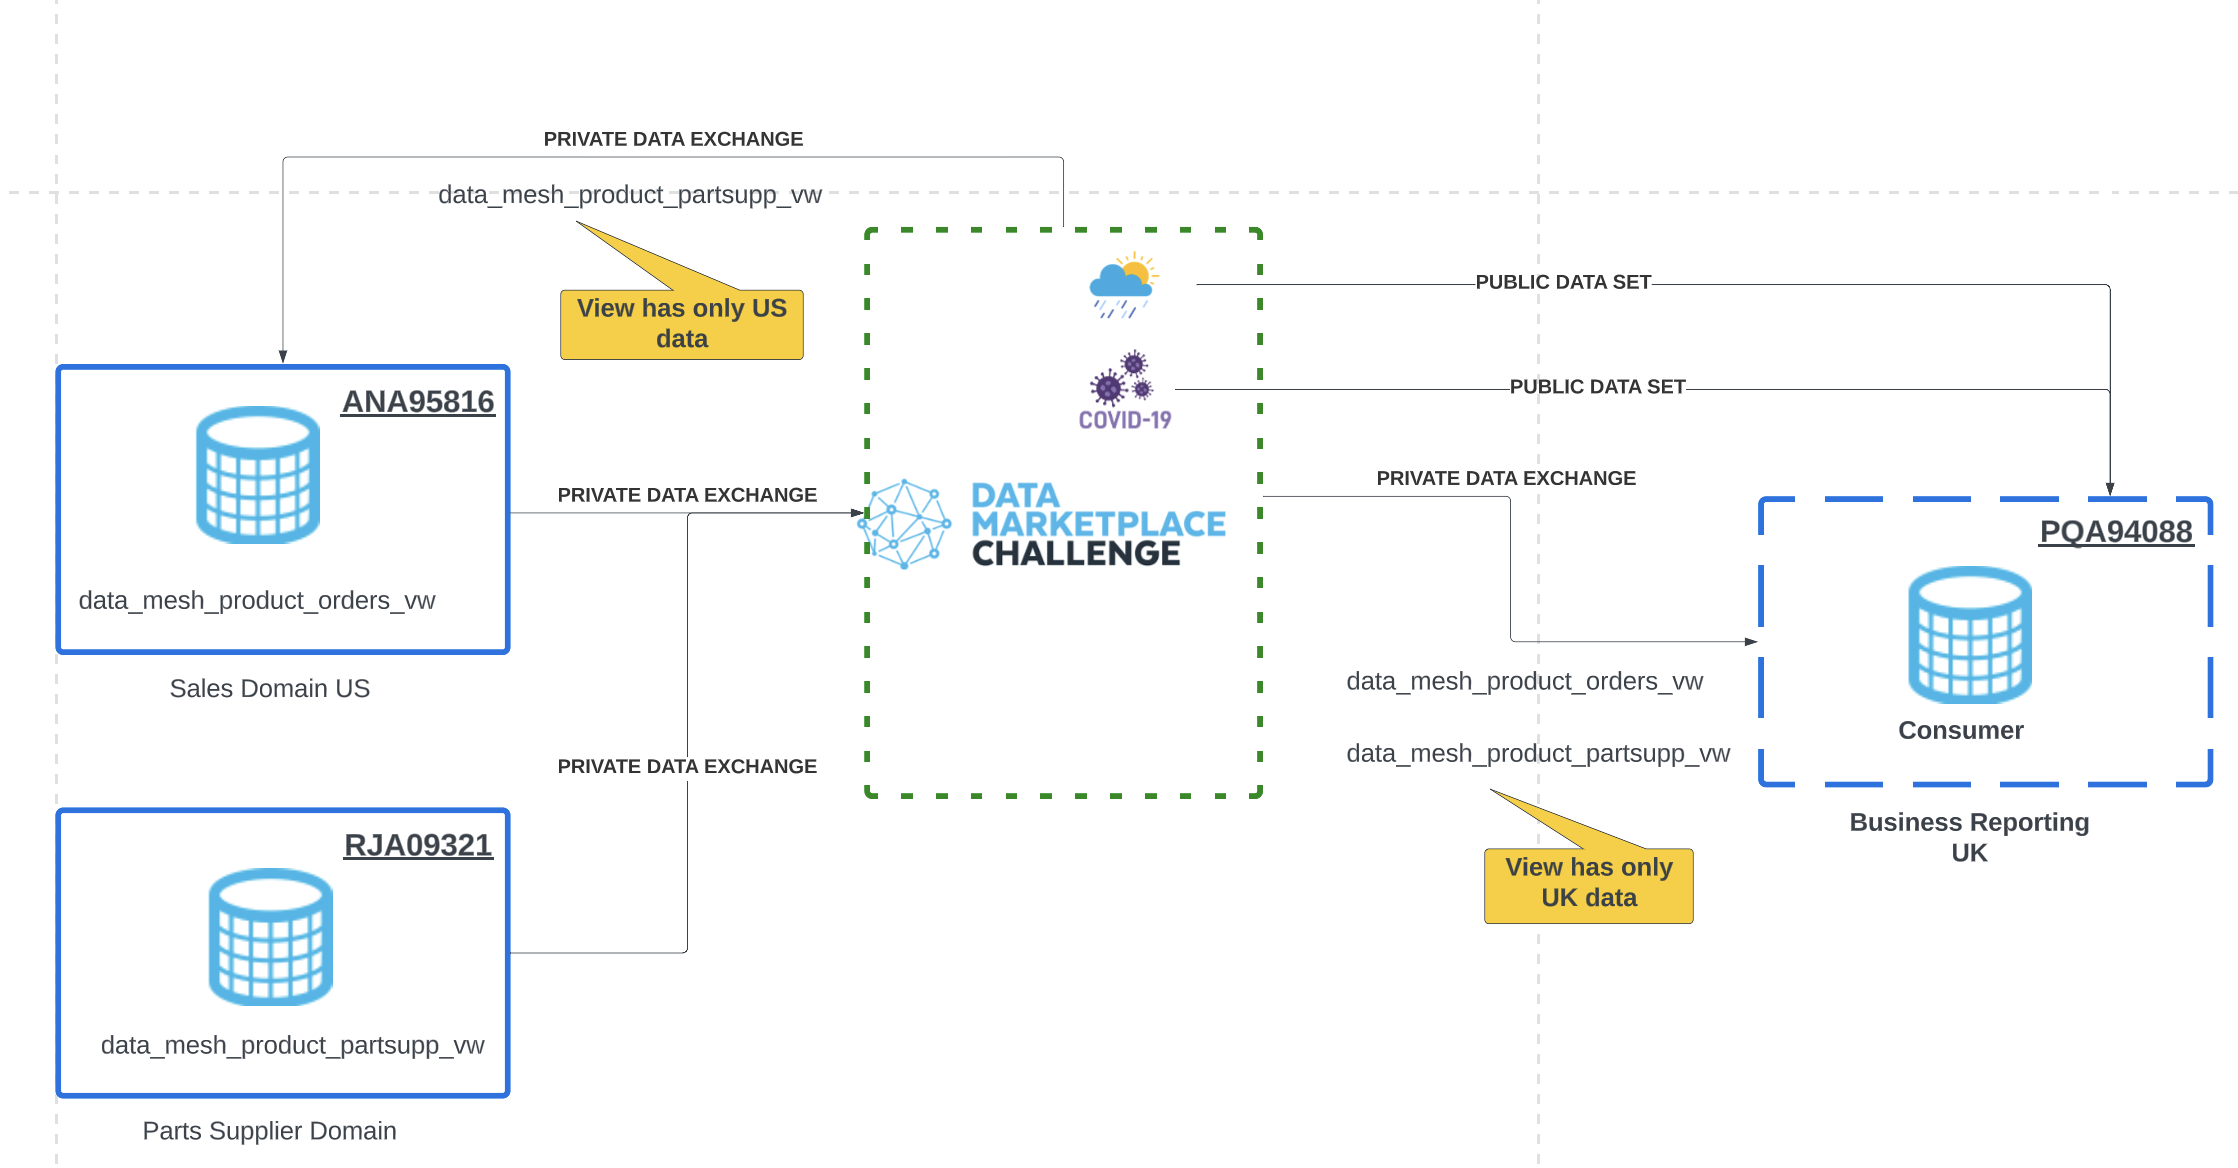

## <ins>Data Consumption - Data Product 1 - Orders data from Sales team</ins>

### CONSUMING DATAPRODUCT - data_mesh_product_orders_vw (view in Snowflake account VT70696)

In [1]:
# Establishing session in Snowflake
import snowflake.snowpark
from snowflake.snowpark.functions import sproc
from snowflake.snowpark.session import Session
from snowflake.snowpark import version as v
import json
from config_consumer import snowflake_conn_prop_local as snowflake_udf_conn_prop

import pandas as pd
import numpy as np
import datetime
import io

session = Session.builder.configs(snowflake_udf_conn_prop).create()
session.sql
print(session.sql('select current_account(), current_warehouse(), current_database(), current_schema()').collect())

session.add_packages('snowflake-snowpark-python', 'pandas', 'numpy')

[Row(CURRENT_ACCOUNT()='PQA94088', CURRENT_WAREHOUSE()='APP_WH', CURRENT_DATABASE()='REPORTING_LAYER', CURRENT_SCHEMA()='PUBLIC')]


In [3]:
session.sql("select current_account()").collect()

[Row(CURRENT_ACCOUNT()='PQA94088')]

In [4]:
session.sql("SHOW SHARES like '%ORDERS_SHARE%';").collect()

[Row(created_on=datetime.datetime(2023, 2, 20, 7, 39, 36, 750000, tzinfo=<DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>), kind='INBOUND', name='SFSENORTHAMERICA.GSI_DCR1.ORDERS_SHARE', database_name='', to='', owner='', comment='', listing_global_name='')]

In [5]:
session.sql("CREATE OR REPLACE DATABASE BI_LAYER_DB FROM SHARE SFSENORTHAMERICA.GSI_DCR1.ORDERS_SHARE;").collect()

[Row(status='Database BI_LAYER_DB successfully created.')]

In [6]:
%%time
session.sql("SELECT * FROM BI_LAYER_DB.PUBLIC.DATA_MESH_PRODUCT_ORDERS_VW limit 5").to_pandas()

CPU times: user 11.4 ms, sys: 5.88 ms, total: 17.3 ms
Wall time: 1min 42s


,C_NAME,O_ORDERDATE,OVERALL_PRICE
0,Customer#014723105,1997-11-23,350038.14
1,Customer#010093756,1998-05-30,350038.14
2,Customer#013611142,1993-06-10,350038.14
3,Customer#005292955,1995-09-30,350038.16
4,Customer#003181931,1995-04-06,350038.16


In [7]:
session.sql("SHOW SHARES like '%PARTSUPP_SHARE%';").collect()

[Row(created_on=datetime.datetime(2023, 2, 20, 8, 34, 55, 193000, tzinfo=<DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>), kind='INBOUND', name='SFSENORTHAMERICA.GSI_DCR3.PARTSUPP_SHARE', database_name='', to='', owner='', comment='', listing_global_name='')]

In [8]:
session.sql("CREATE OR REPLACE DATABASE BI_LAYER_PARTSUPP_DB FROM SHARE SFSENORTHAMERICA.GSI_DCR3.PARTSUPP_SHARE;").collect()

[Row(status='Database BI_LAYER_PARTSUPP_DB successfully created.')]

In [10]:
%%time
session.sql("SELECT * FROM BI_LAYER_PARTSUPP_DB.PUBLIC.DATA_MESH_PRODUCT_PARTSUPP_VW limit 5").to_pandas()

CPU times: user 8.94 ms, sys: 6.57 ms, total: 15.5 ms
Wall time: 5.89 s


,PS_PARTKEY,P_NAME,N_NAME,AVAILABLE_QUANTITY,TOTAL_COST_ACROSS_SUPPLIERS
0,5623789,linen ivory lime seashell snow,UNITED KINGDOM,7856,710.19
1,17856071,sienna cornflower chocolate wheat blue,UNITED KINGDOM,7856,712.20
2,12547229,burlywood lemon orchid steel ghost,UNITED KINGDOM,7856,713.55
3,4078203,aquamarine coral cornsilk dodger royal,UNITED KINGDOM,7856,715.04
4,3253730,indian maroon forest peru grey,UNITED KINGDOM,7856,716.31


In [12]:
if session: # it is good to ensure there is NO ACTIVE SESSION when using Snowpark in notebook hence closing down any session for code reusablity
    session.close()

KeyError: <snowflake.snowpark.session.Session object at 0x7fb93b1ba400>